In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option("display.max_columns", None)

In [2]:
li_batt_df = pd.read_csv("lithium-ion batteries.csv")
li_batt_df.head(5)

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
0,mp-849394,Li2MnSiO4,Pc,-2.699,0.006,3.462,16,2.993,178.513,True,monoclinic
1,mp-783909,Li2MnSiO4,P21/c,-2.696,0.008,2.879,32,2.926,365.272,True,monoclinic
2,mp-761311,Li4MnSi2O7,Cc,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic
3,mp-761598,Li4Mn2Si3O10,C2/c,-2.783,0.013,3.015,38,2.908,436.183,True,monoclinic
4,mp-767709,Li2Mn3Si3O10,C2/c,-2.747,0.016,2.578,36,3.334,421.286,True,monoclinic


In [3]:
li_batt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Materials Id           339 non-null    object 
 1   Formula                339 non-null    object 
 2   Spacegroup             339 non-null    object 
 3   Formation Energy (eV)  339 non-null    float64
 4   E Above Hull (eV)      339 non-null    float64
 5   Band Gap (eV)          339 non-null    float64
 6   Nsites                 339 non-null    int64  
 7   Density (gm/cc)        339 non-null    float64
 8   Volume                 339 non-null    float64
 9   Has Bandstructure      339 non-null    bool   
 10  Crystal System         339 non-null    object 
dtypes: bool(1), float64(5), int64(1), object(4)
memory usage: 26.9+ KB


It seems that the data is clean so there is no need of missing value imputations.

In [4]:
# checking unique values 
li_batt_df.nunique()

Materials Id             339
Formula                  114
Spacegroup                44
Formation Energy (eV)    251
E Above Hull (eV)        108
Band Gap (eV)            307
Nsites                    49
Density (gm/cc)          300
Volume                   339
Has Bandstructure          2
Crystal System             3
dtype: int64

In [5]:
!pip install chemparse
import chemparse

In [6]:
# Parsing the Formula
li_batt_form_dict = li_batt_df.Formula.apply(chemparse.parse_formula)
li_batt_form_dict

0       {'Li': 2.0, 'Mn': 1.0, 'Si': 1.0, 'O': 4.0}
1       {'Li': 2.0, 'Mn': 1.0, 'Si': 1.0, 'O': 4.0}
2       {'Li': 4.0, 'Mn': 1.0, 'Si': 2.0, 'O': 7.0}
3      {'Li': 4.0, 'Mn': 2.0, 'Si': 3.0, 'O': 10.0}
4      {'Li': 2.0, 'Mn': 3.0, 'Si': 3.0, 'O': 10.0}
                           ...                     
334     {'O': 8.0, 'Si': 2.0, 'Li': 6.0, 'Co': 1.0}
335     {'O': 8.0, 'Si': 2.0, 'Li': 1.0, 'Co': 3.0}
336    {'O': 20.0, 'Si': 6.0, 'Li': 5.0, 'Co': 4.0}
337     {'Li': 1.0, 'Co': 1.0, 'Si': 1.0, 'O': 4.0}
338     {'O': 8.0, 'Si': 2.0, 'Li': 3.0, 'Co': 2.0}
Name: Formula, Length: 339, dtype: object

In [7]:
# Normalize semi-structured JSON data into a flat table.
li_batt_form_parsed_df = pd.json_normalize(li_batt_form_dict)
li_batt_form_parsed_df

,Li,Mn,Si,O,Fe,Co
0,2.0,1.0,1.0,4.0,NaN,NaN
1,2.0,1.0,1.0,4.0,NaN,NaN
2,4.0,1.0,2.0,7.0,NaN,NaN
3,4.0,2.0,3.0,10.0,NaN,NaN
4,2.0,3.0,3.0,10.0,NaN,NaN
...,...,...,...,...,...,...
334,6.0,NaN,2.0,8.0,NaN,1.0
335,1.0,NaN,2.0,8.0,NaN,3.0
336,5.0,NaN,6.0,20.0,NaN,4.0
337,1.0,NaN,1.0,4.0,NaN,1.0


In [8]:
li_batt_form_parsed_df.fillna(0, inplace=True)
li_batt_form_parsed_df

,Li,Mn,Si,O,Fe,Co
0,2.0,1.0,1.0,4.0,0.0,0.0
1,2.0,1.0,1.0,4.0,0.0,0.0
2,4.0,1.0,2.0,7.0,0.0,0.0
3,4.0,2.0,3.0,10.0,0.0,0.0
4,2.0,3.0,3.0,10.0,0.0,0.0
...,...,...,...,...,...,...
334,6.0,0.0,2.0,8.0,0.0,1.0
335,1.0,0.0,2.0,8.0,0.0,3.0
336,5.0,0.0,6.0,20.0,0.0,4.0
337,1.0,0.0,1.0,4.0,0.0,1.0


In [9]:
li_batt_df = li_batt_df.join(li_batt_form_parsed_df)
li_batt_df

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System,Li,Mn,Si,O,Fe,Co
0,mp-849394,Li2MnSiO4,Pc,-2.699,0.006,3.462,16,2.993,178.513,True,monoclinic,2.0,1.0,1.0,4.0,0.0,0.0
1,mp-783909,Li2MnSiO4,P21/c,-2.696,0.008,2.879,32,2.926,365.272,True,monoclinic,2.0,1.0,1.0,4.0,0.0,0.0
2,mp-761311,Li4MnSi2O7,Cc,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic,4.0,1.0,2.0,7.0,0.0,0.0
3,mp-761598,Li4Mn2Si3O10,C2/c,-2.783,0.013,3.015,38,2.908,436.183,True,monoclinic,4.0,2.0,3.0,10.0,0.0,0.0
4,mp-767709,Li2Mn3Si3O10,C2/c,-2.747,0.016,2.578,36,3.334,421.286,True,monoclinic,2.0,3.0,3.0,10.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,mp-764961,Li6Co(SiO4)2,P1,-2.545,0.071,2.685,17,2.753,171.772,True,triclinic,6.0,0.0,2.0,8.0,0.0,1.0
335,mp-849520,LiCo3(SiO4)2,P1,-2.250,0.076,0.005,42,3.318,552.402,True,triclinic,1.0,0.0,2.0,8.0,0.0,3.0
336,mp-849656,Li5Co4(Si3O10)2,P1,-2.529,0.082,0.176,35,2.940,428.648,True,triclinic,5.0,0.0,6.0,20.0,0.0,4.0
337,mp-763557,LiCoSiO4,P1,-2.348,0.087,1.333,14,2.451,214.044,True,triclinic,1.0,0.0,1.0,4.0,0.0,1.0


In [10]:
# dropping the Formula and Materials ID
li_batt_df.drop(columns=["Materials Id", "Formula"], axis=1, inplace=True)
li_batt_df.head(5)

,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System,Li,Mn,Si,O,Fe,Co
0,Pc,-2.699,0.006,3.462,16,2.993,178.513,True,monoclinic,2.0,1.0,1.0,4.0,0.0,0.0
1,P21/c,-2.696,0.008,2.879,32,2.926,365.272,True,monoclinic,2.0,1.0,1.0,4.0,0.0,0.0
2,Cc,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic,4.0,1.0,2.0,7.0,0.0,0.0
3,C2/c,-2.783,0.013,3.015,38,2.908,436.183,True,monoclinic,4.0,2.0,3.0,10.0,0.0,0.0
4,C2/c,-2.747,0.016,2.578,36,3.334,421.286,True,monoclinic,2.0,3.0,3.0,10.0,0.0,0.0


In [11]:
# checking the unique values of categorical data
cat_df = li_batt_df.select_dtypes(include=["object"])
cat_df.nunique()

Spacegroup        44
Crystal System     3
dtype: int64

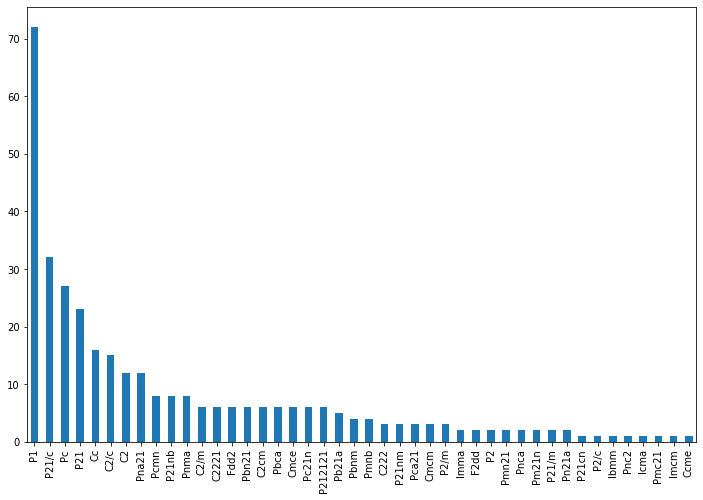

In [12]:
# plotting counts of space group
space_group_data = li_batt_df.Spacegroup.value_counts()
plt.figure(figsize=(12,8))
space_group_data.plot(kind='bar')
plt.show()

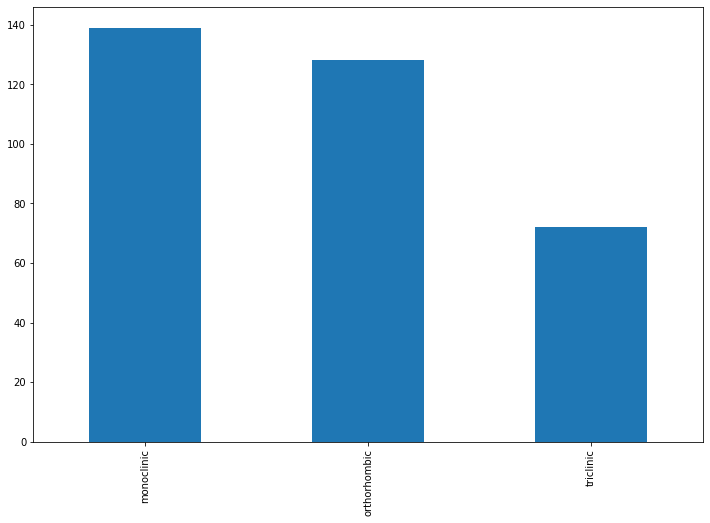

In [13]:
# plotting the counts of target feature Crystal System.
crystal_system_dict = li_batt_df["Crystal System"].value_counts()
plt.figure(figsize=(12,8))
crystal_system_dict.plot(kind='bar')
plt.show()

TriClinic samples are less than others two but still the class imbalance problem isn't that severe.

In [14]:
# Now lets us convert the categorical columns into numerical columns.
# assign the Spacegroup rows into the numerical data then coverting it into the integer type. 
# Dense method assigns unique value incremented by 1 for each group
li_batt_df.Spacegroup = li_batt_df.Spacegroup.rank(method="dense").astype(int)
li_batt_df.head(5)

,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System,Li,Mn,Si,O,Fe,Co
0,32,-2.699,0.006,3.462,16,2.993,178.513,True,monoclinic,2.0,1.0,1.0,4.0,0.0,0.0
1,22,-2.696,0.008,2.879,32,2.926,365.272,True,monoclinic,2.0,1.0,1.0,4.0,0.0,0.0
2,7,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic,4.0,1.0,2.0,7.0,0.0,0.0
3,2,-2.783,0.013,3.015,38,2.908,436.183,True,monoclinic,4.0,2.0,3.0,10.0,0.0,0.0
4,2,-2.747,0.016,2.578,36,3.334,421.286,True,monoclinic,2.0,3.0,3.0,10.0,0.0,0.0


In [15]:
li_batt_df["Has Bandstructure"] = li_batt_df["Has Bandstructure"].map({True: 1, False: 0})
li_batt_df.head(10)

,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System,Li,Mn,Si,O,Fe,Co
0,32,-2.699,0.006,3.462,16,2.993,178.513,1,monoclinic,2.0,1.0,1.0,4.0,0.0,0.0
1,22,-2.696,0.008,2.879,32,2.926,365.272,1,monoclinic,2.0,1.0,1.0,4.0,0.0,0.0
2,7,-2.775,0.012,3.653,28,2.761,301.775,1,monoclinic,4.0,1.0,2.0,7.0,0.0,0.0
3,2,-2.783,0.013,3.015,38,2.908,436.183,1,monoclinic,4.0,2.0,3.0,10.0,0.0,0.0
4,2,-2.747,0.016,2.578,36,3.334,421.286,1,monoclinic,2.0,3.0,3.0,10.0,0.0,0.0
5,1,-2.763,0.024,3.293,14,2.792,149.207,1,monoclinic,4.0,1.0,2.0,7.0,0.0,0.0
6,21,-2.650,0.027,1.052,28,3.507,291.575,0,monoclinic,1.0,1.0,1.0,4.0,0.0,0.0
7,22,-2.676,0.029,3.384,32,2.927,365.179,0,monoclinic,2.0,1.0,1.0,4.0,0.0,0.0
8,2,-2.822,0.038,0.612,20,3.255,218.360,1,monoclinic,1.0,1.0,2.0,6.0,0.0,0.0
9,7,-2.823,0.040,3.447,22,2.700,271.853,1,monoclinic,2.0,1.0,2.0,6.0,0.0,0.0


In [18]:
crystal_system_cat_to_num_map = {"monoclinic": 0, "orthorhombic": 1, "triclinic":2}
li_batt_df["Crystal System"] = li_batt_df["Crystal System"].map(crystal_system_cat_to_num_map)
li_batt_df.head(5)

,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System,Li,Mn,Si,O,Fe,Co
0,32,-2.699,0.006,3.462,16,2.993,178.513,1,0,2.0,1.0,1.0,4.0,0.0,0.0
1,22,-2.696,0.008,2.879,32,2.926,365.272,1,0,2.0,1.0,1.0,4.0,0.0,0.0
2,7,-2.775,0.012,3.653,28,2.761,301.775,1,0,4.0,1.0,2.0,7.0,0.0,0.0
3,2,-2.783,0.013,3.015,38,2.908,436.183,1,0,4.0,2.0,3.0,10.0,0.0,0.0
4,2,-2.747,0.016,2.578,36,3.334,421.286,1,0,2.0,3.0,3.0,10.0,0.0,0.0


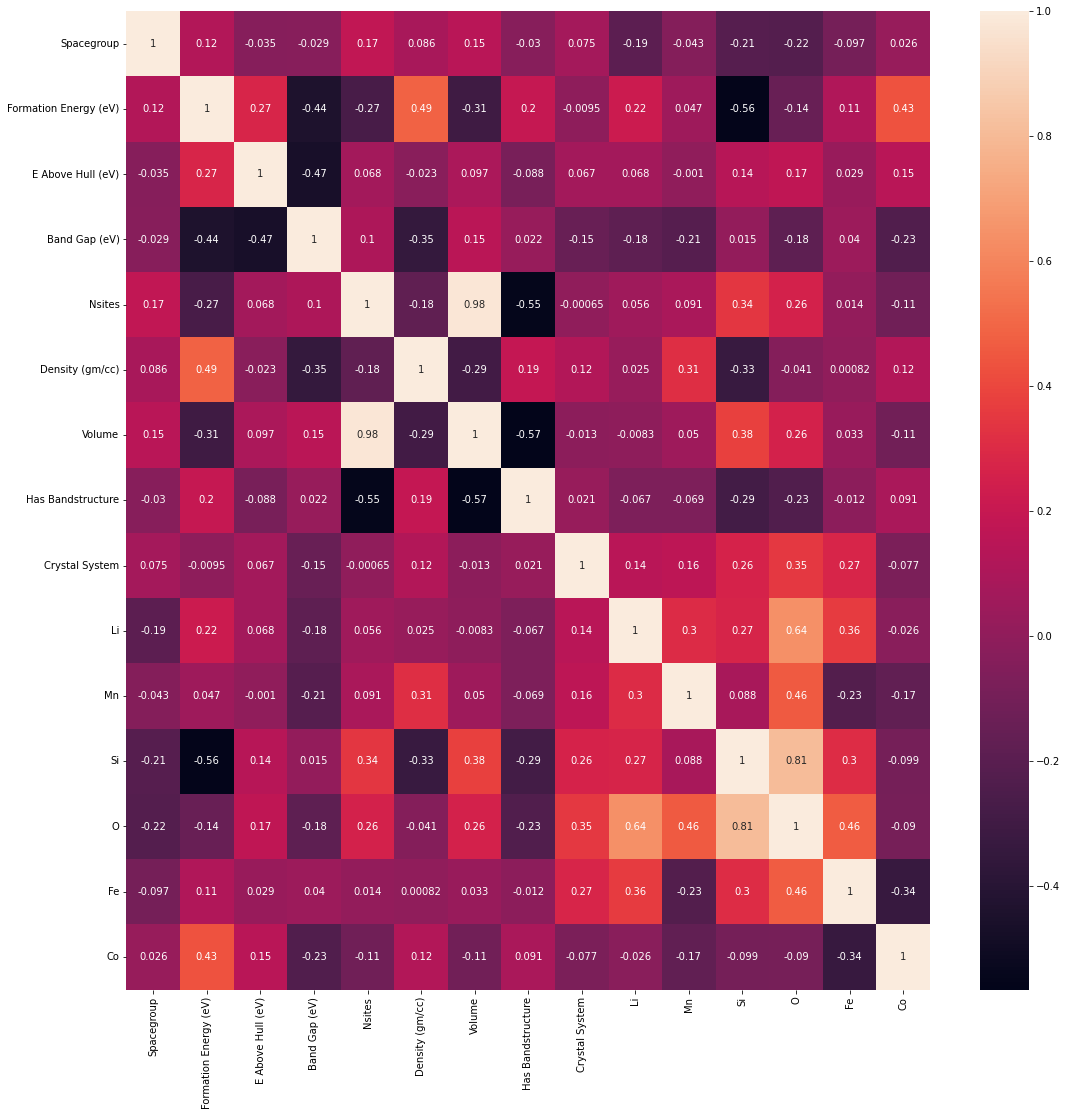

In [20]:
plt.figure(figsize=(18,18))
sns.heatmap(data=li_batt_df.corr(), annot=True)
plt.show()

From the heatmap the feature Nsites and Volumes are highly correlated with value of 0.98 so we will drop one of these features.

In [21]:
li_batt_df.drop(columns=["Volume"], axis=1, inplace=True)
li_batt_df.head(5)

,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Has Bandstructure,Crystal System,Li,Mn,Si,O,Fe,Co
0,32,-2.699,0.006,3.462,16,2.993,1,0,2.0,1.0,1.0,4.0,0.0,0.0
1,22,-2.696,0.008,2.879,32,2.926,1,0,2.0,1.0,1.0,4.0,0.0,0.0
2,7,-2.775,0.012,3.653,28,2.761,1,0,4.0,1.0,2.0,7.0,0.0,0.0
3,2,-2.783,0.013,3.015,38,2.908,1,0,4.0,2.0,3.0,10.0,0.0,0.0
4,2,-2.747,0.016,2.578,36,3.334,1,0,2.0,3.0,3.0,10.0,0.0,0.0


Plotting the distriution plot for the numerical data Formation Energy (eV), E Above Hull (eV), Band Gap (eV), Nsites.

/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

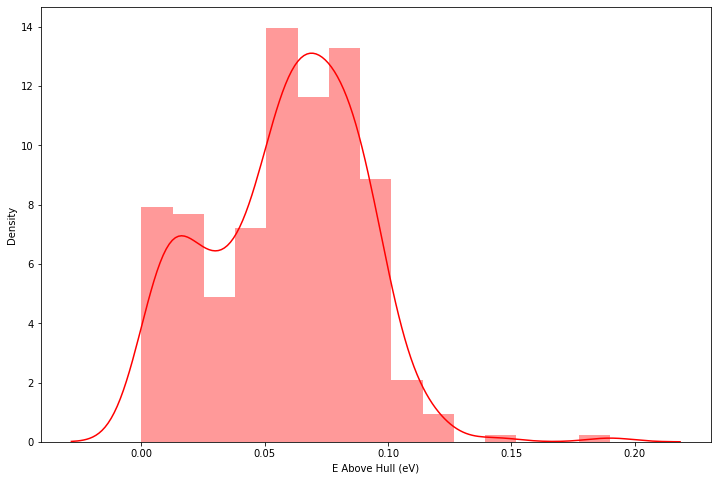

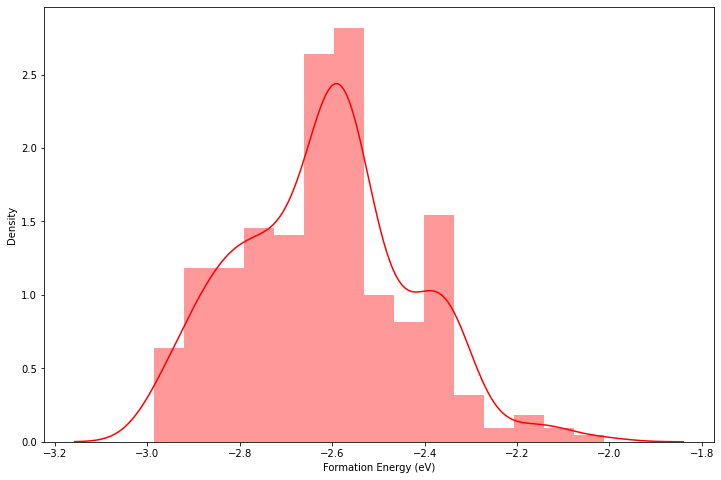

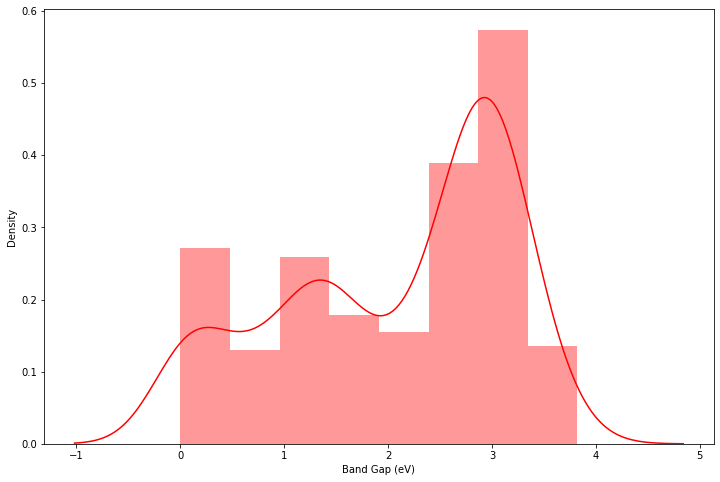

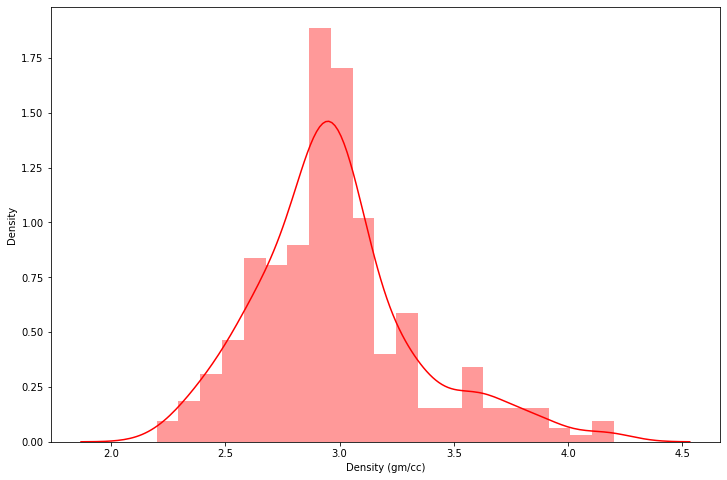

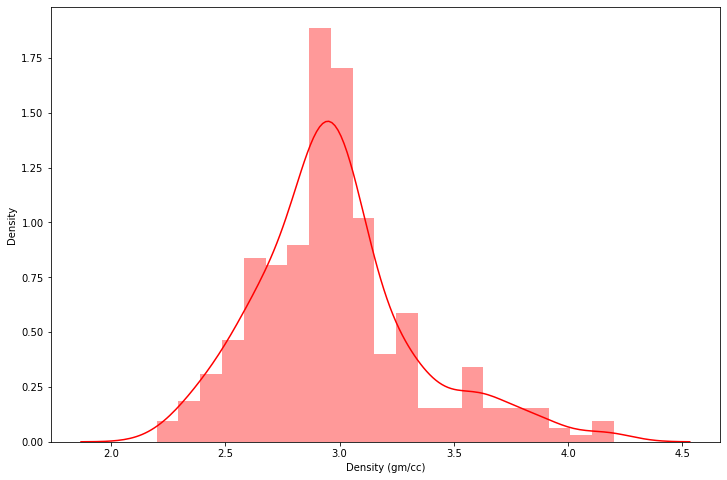

In [24]:
num_columns = ["E Above Hull (eV)", "Formation Energy (eV)", "Band Gap (eV)", "Density (gm/cc)", "Density (gm/cc)"]
for col in num_columns:
    plt.figure(figsize=(12,8))
    sns.distplot(li_batt_df[col], color='red')
plt.show()

It seems that only Band Gap (eV) is negative skewed other seems to be fairly normal in distributions.

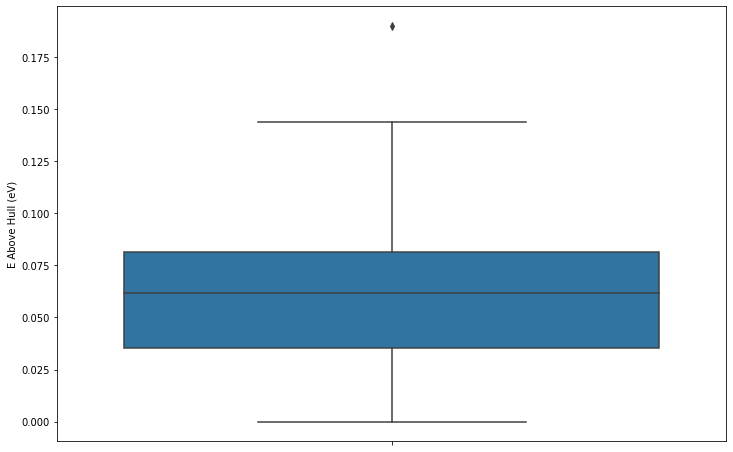

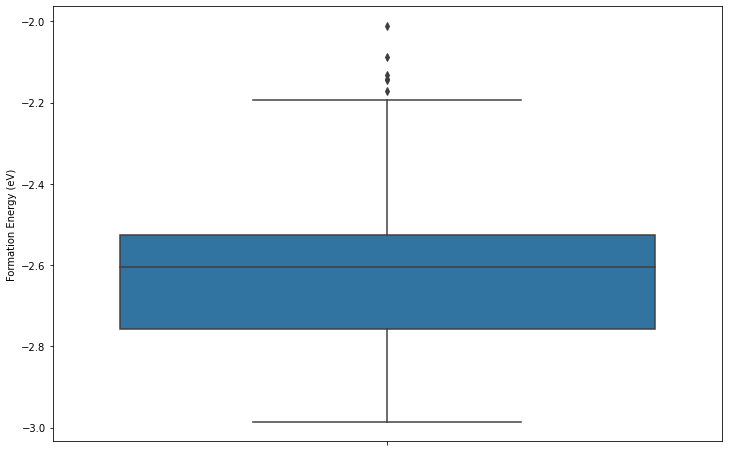

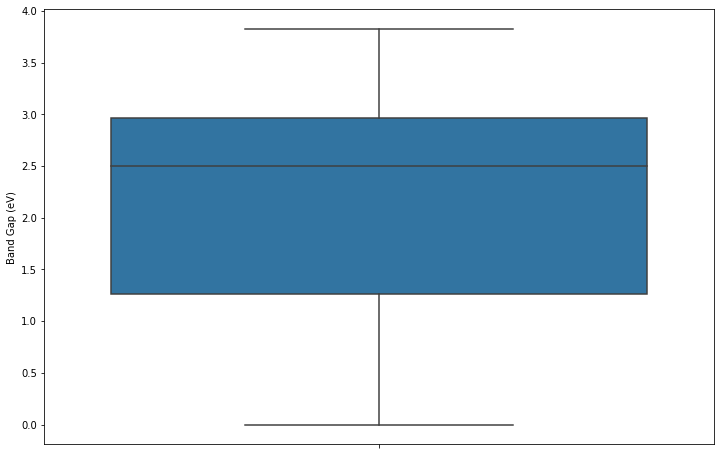

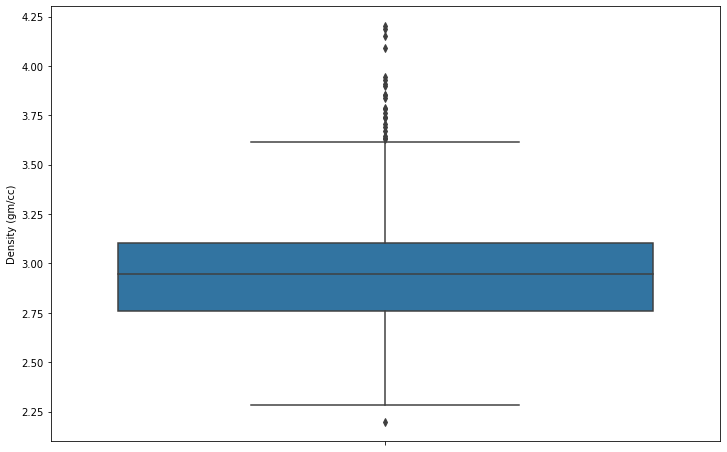

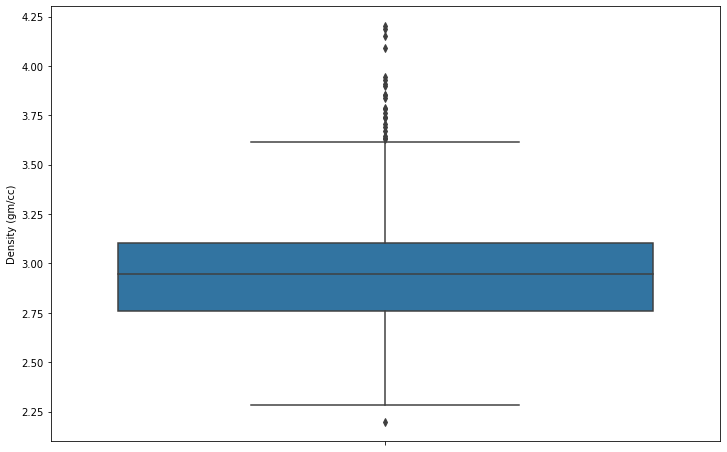

In [28]:
## plotting the box plot for numerical data.
for col in num_columns:
    plt.figure(figsize=(12,8))
    sns.boxplot(y=col, data=li_batt_df)
plt.show()

It seems there are some outliers in our dataset. We are unable to do anything to outliers as it needs the understanding of origion of outliers.

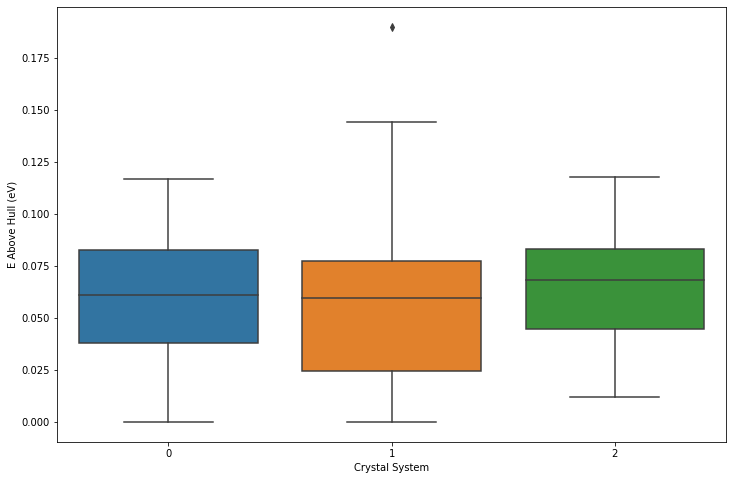

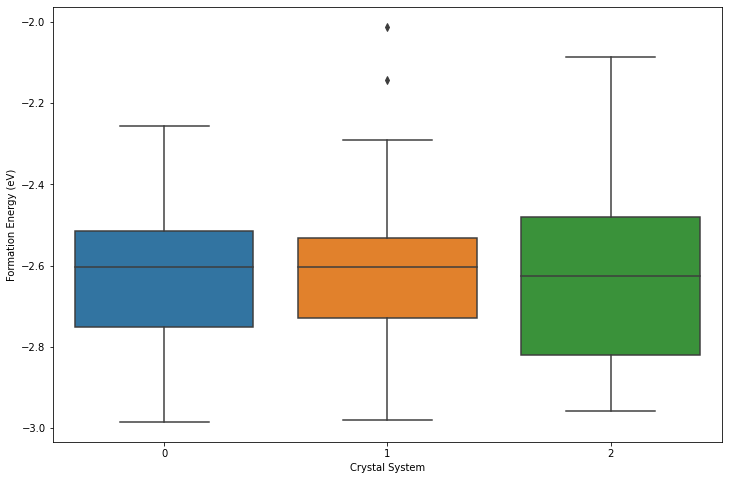

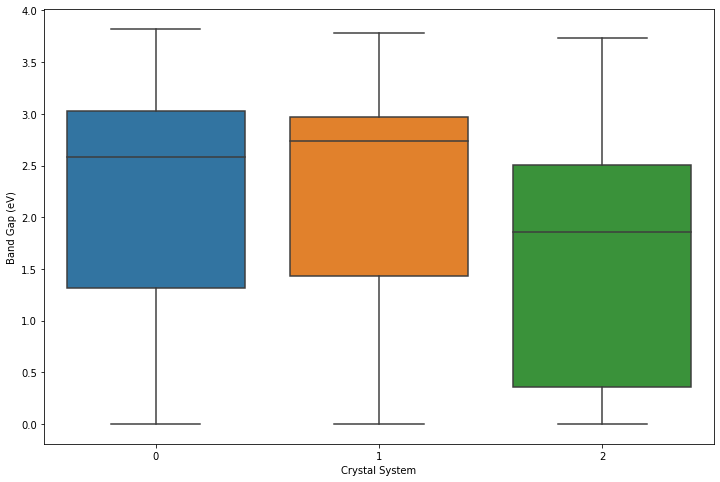

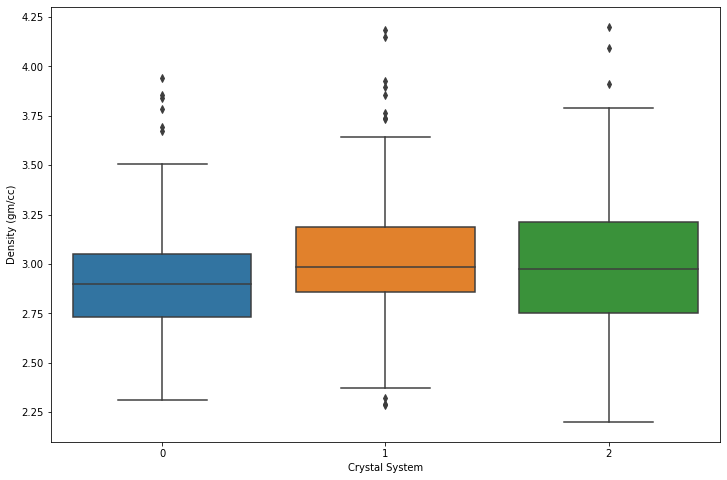

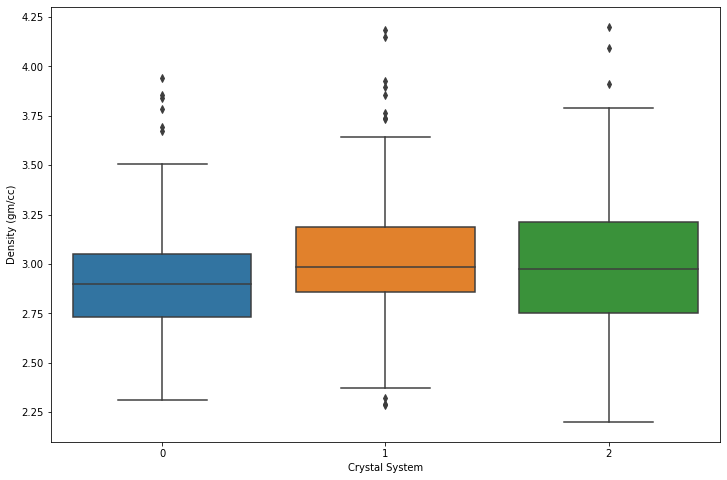

In [29]:
## plotting the box plot for numerical data with respect to target varibles.
for col in num_columns:
    plt.figure(figsize=(12,8))
    sns.boxplot(x="Crystal System", y=col, data=li_batt_df)
plt.show()

In [41]:
dependent_cols = li_batt_df.columns.to_list()
dependent_cols.remove("Crystal System")
dependent_cols

['Spacegroup',
 'Formation Energy (eV)',
 'E Above Hull (eV)',
 'Band Gap (eV)',
 'Nsites',
 'Density (gm/cc)',
 'Has Bandstructure',
 'Li',
 'Mn',
 'Si',
 'O',
 'Fe',
 'Co']

In [42]:
# separating dataframes into dependent and independent variable
X = li_batt_df.loc[:,dependent_cols]
X.head(5)

,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Has Bandstructure,Li,Mn,Si,O,Fe,Co
0,32,-2.699,0.006,3.462,16,2.993,1,2.0,1.0,1.0,4.0,0.0,0.0
1,22,-2.696,0.008,2.879,32,2.926,1,2.0,1.0,1.0,4.0,0.0,0.0
2,7,-2.775,0.012,3.653,28,2.761,1,4.0,1.0,2.0,7.0,0.0,0.0
3,2,-2.783,0.013,3.015,38,2.908,1,4.0,2.0,3.0,10.0,0.0,0.0
4,2,-2.747,0.016,2.578,36,3.334,1,2.0,3.0,3.0,10.0,0.0,0.0


In [43]:
y = li_batt_df["Crystal System"]

In [45]:
# train test split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50, stratify=y)
X_train.shape, y_train.shape

((271, 13), (271,))

In [46]:
X_test.shape, y_test.shape

((68, 13), (68,))

from sklearn.preprocessing import StandardScaler

ssc = StandardScaler()
X_train_sc = ssc.fit_transform(X_train)
X_test_sc = ssc.transform(X_test)
X_train_sc

In [48]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_sc, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [50]:
from sklearn.metrics import accuracy_score
y_test_pred = xgb_clf.predict(X_test)
print("Train accuracy: ", xgb_clf.score(X_train_sc, y_train))
print("Test accuracy: ", accuracy_score(y_test, y_test))

Train accuracy:  1.0
Test accuracy:  1.0


It seems that we can had reached the accuracy level of 1 for this dataset. We will again check with cross validation score.

In [54]:
from sklearn.model_selection import cross_val_score
import numpy as np

xgb_clf_cv = XGBClassifier()

X_sc = ssc.transform(X)

scores = cross_val_score(xgb_clf_cv, X_sc, y, cv=5)
average_accuracy = np.average(scores)
print("Average test accuracy with cross validation: ", average_accuracy)

Average test accuracy with cross validation:  0.9970149253731343
